<img src="https://github.com/beata-faitli/Turtle-Games/blob/main/Turtle%20games%20logo.png?raw=true" alt="Turtle Games logo" width="200"/>

### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

# Table of Contents

1. [Scenario](#Scenario)
2. [Library Imports](#Library-imports)
3. [Linear regression using Python](#Linear-regression-using-Python)
    1. [Data Cleaning](#Data-Cleaning)
    2. [Exploratory Data Analysis](#Exploratory-data-analysis)
5. [Setting up the Notebook workflow](#Setting-up-the-Notebook-workflow)

<a id="Scenario"></a>
### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- exploring the structure using decision trees (Week 2)
- exploring clusters in customer behaviour (Week 3)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 4)
- loading, transforming and visualising data in R (Week 5)
- statistical analysis and modelling in R (Week 6)

<a id="Linear-regression-using-Python"></a>
# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and goodness of fit metrics to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

<a id="Library-imports"></a>
## 1. Library imports

In [7]:
# Standard library imports:
import os
import sys
import logging
import subprocess
import warnings
import re

# Third-party library imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [8]:
# To print your directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: C:\Users\beata\OneDrive\Beata\DA Career Accelerator\Assignment 3 - R\Assignment_files


In [9]:
# set up logging and reduce warning messages

# Suppress FutureWarning
warnings.filterwarnings("ignore")

# Suppress informational messages
logging.getLogger('matplotlib').setLevel(logging.WARNING)

# Set up logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s', handlers=[
    logging.StreamHandler()
])

In [10]:
# Functions to load and save data
# Define a function to load data
def load_data(file_path, file_type='csv'):
    try:
        if file_type == 'csv':
            df = pd.read_csv(file_path)
        elif file_type == 'excel':
            df = pd.read_excel(file_path)
        logging.info(f"Data loaded successfully from {file_path}")
        return df
    except Exception as e:
        logging.error(f"Error loading data from {file_path}: {str(e)}")
        return None

# Function to save results
def save_results(df, file_path):
    if df is None:
        logging.error(f"Cannot save results to {file_path}: DataFrame is None")
        return
    try:
        logging.info(f'Saving results to {file_path}')
        df.to_csv(file_path, index=False)
        logging.info(f'Successfully saved results to {file_path}')
    except Exception as e:
        logging.error(f"Error saving file to {file_path}: {str(e)}")
        raise

<a id="Data-Cleaning"></a>
## Sense Checking data and data cleaning

In [12]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [13]:
reviews.tail()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars
1999,Male,32,92.66,8,479,PhD,EN,Web,453,This game is fun. A lot like scrabble without ...,Love this game


In [14]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


2024-08-22 10:31:11,460 - INFO - Data loaded successfully from turtle_reviews.csv
2024-08-22 10:31:11,461 - INFO - Sense checking data for turtle_reviews.csv
2024-08-22 10:31:11,462 - INFO - 
turtle_reviews.csv - Data Info:

2024-08-22 10:31:11,469 - INFO - 
turtle_reviews.csv - Data Shape: (2000, 11)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars
1999,Male,32,92.66,8,479,PhD,EN,Web,453,This game is fun. A lot like scrabble without ...,Love this game


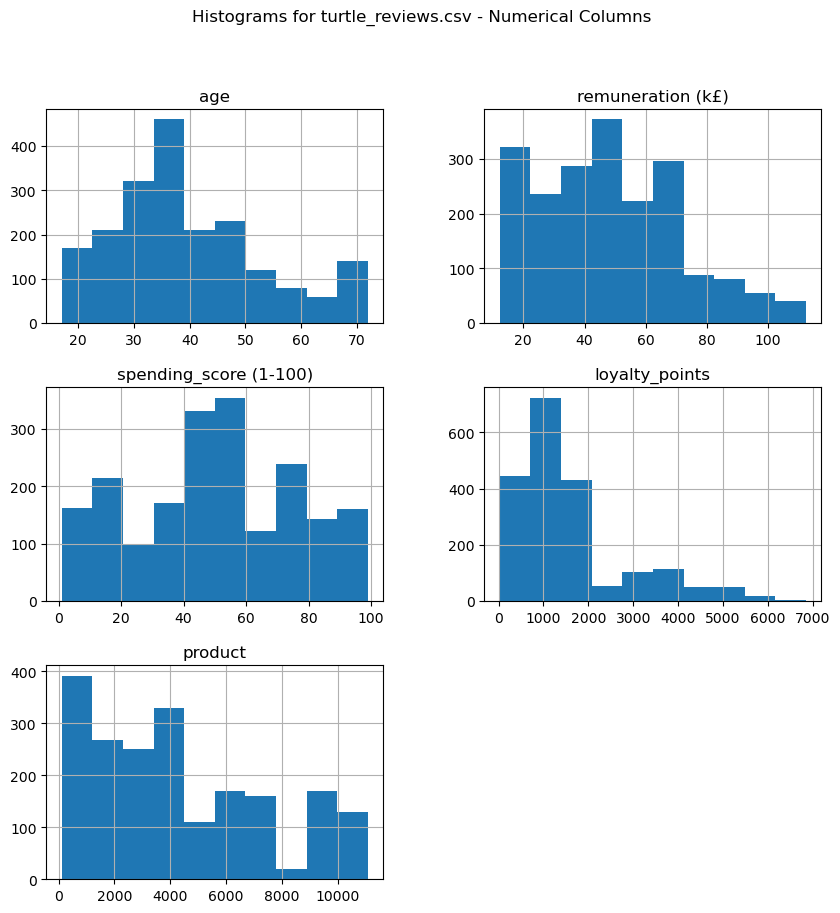

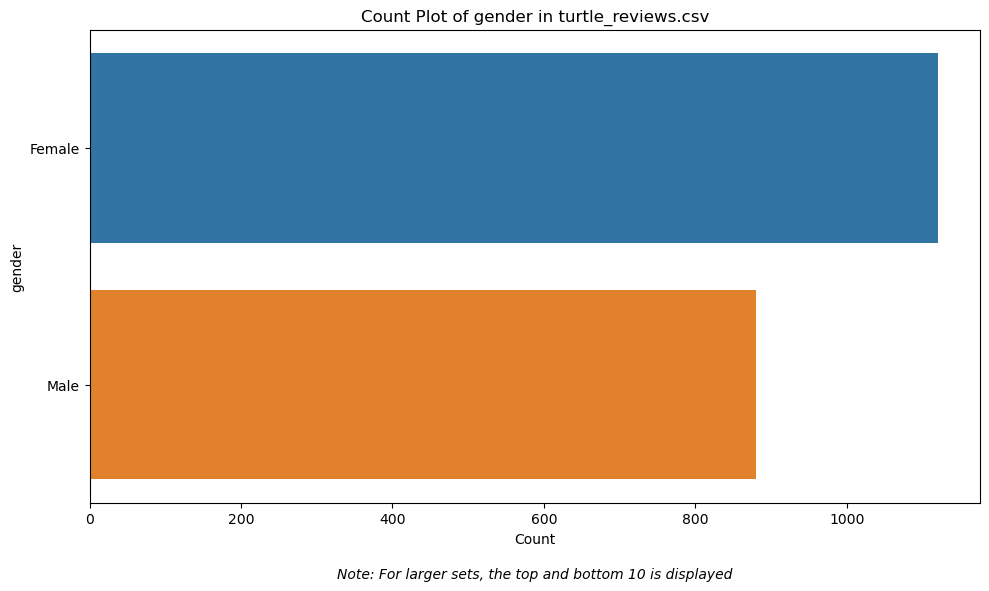

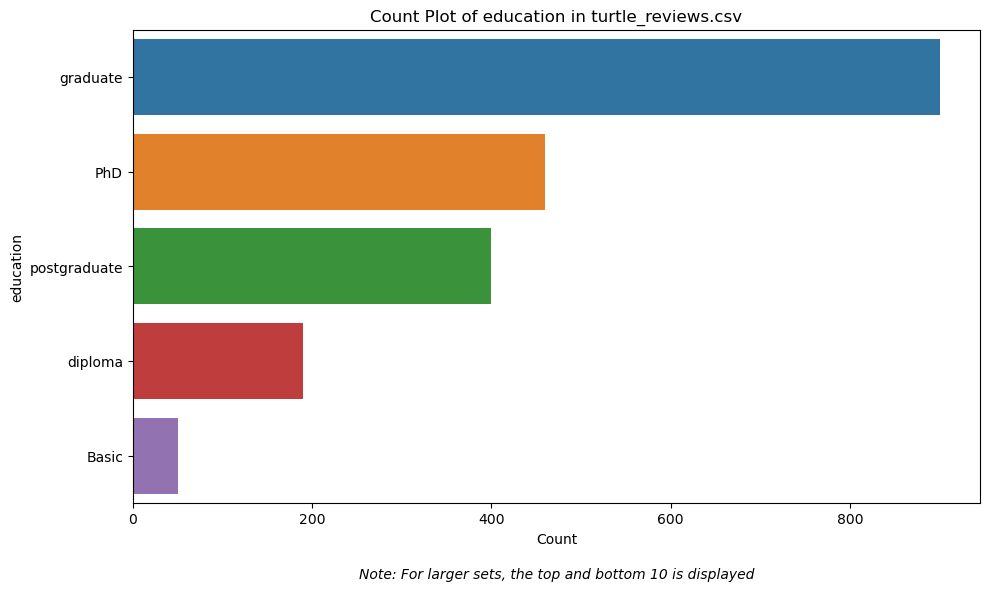

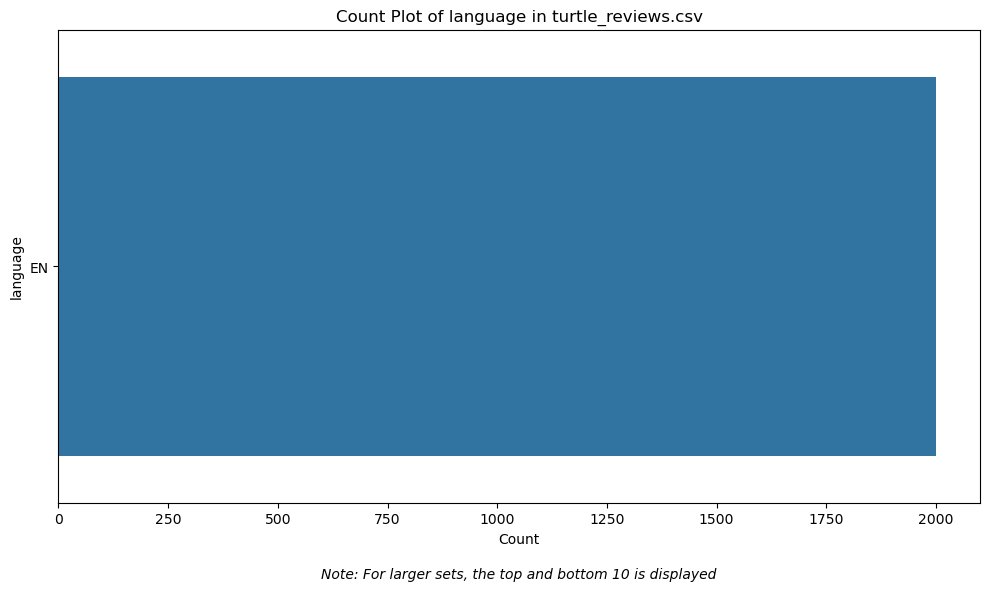

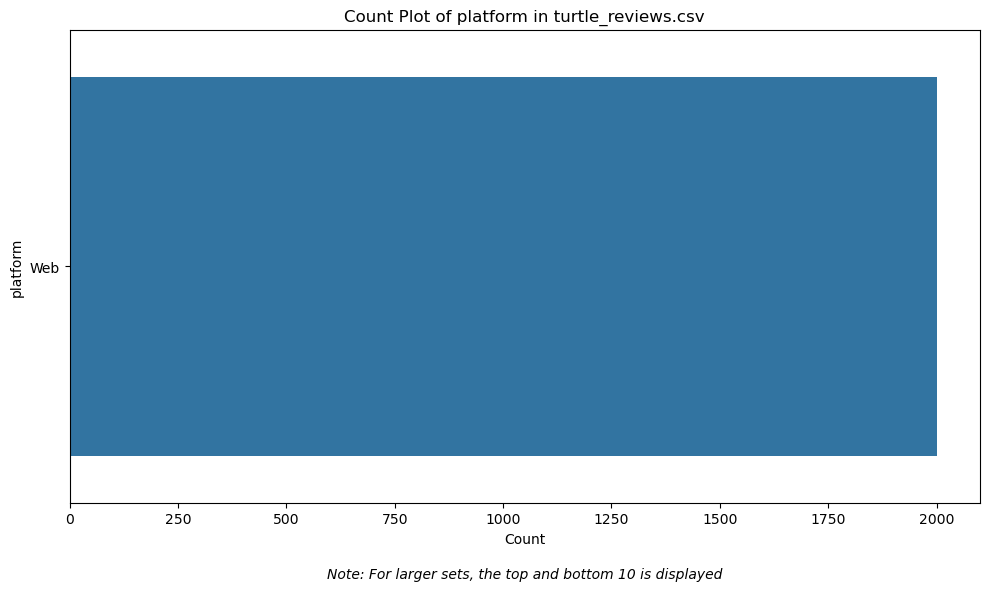

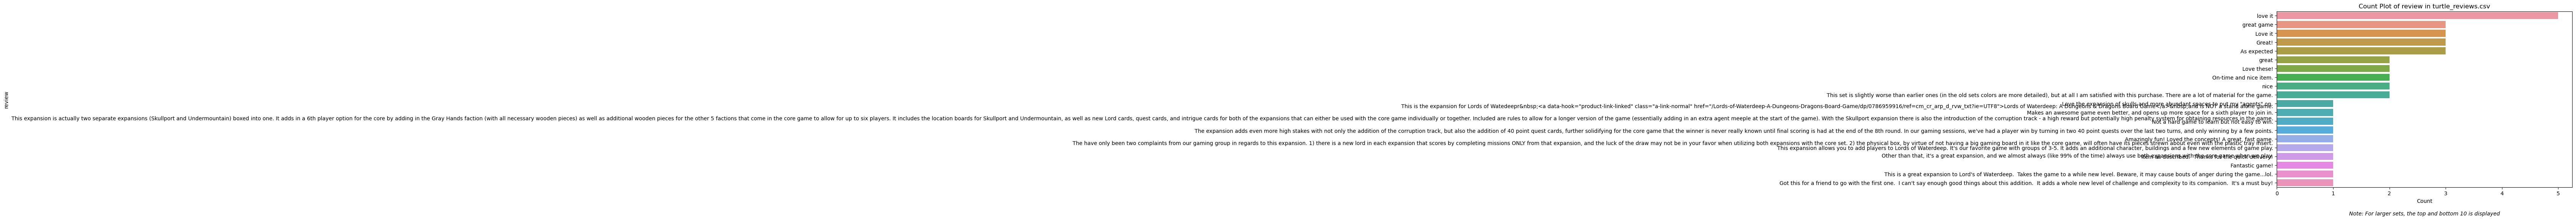

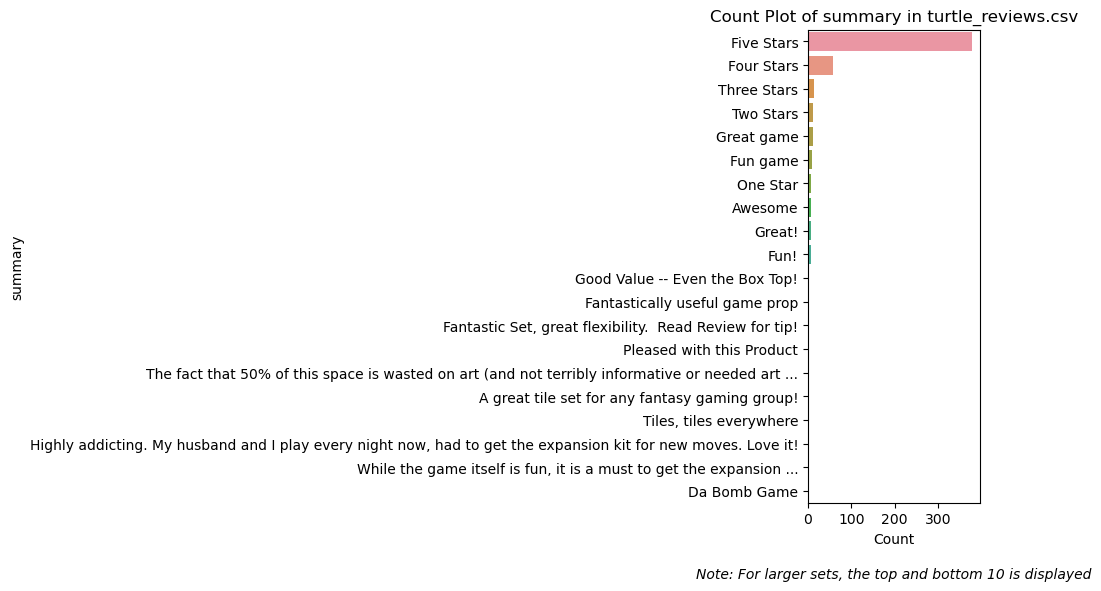

In [15]:
# Function to sense check data
def sense_check_data(df, file_name):
    try:
        logging.info(f"Sense checking data for {file_name}")
        logging.info(f"\n{file_name} - Data Info:\n")
        df.info()
        logging.info(f"\n{file_name} - Data Shape: {df.shape}")
        # logging.info(f"\n{file_name} - Data Description:\n{df.describe(include='all')}") 
        # If you would like to include the statistical description at this stage too.
        
        display(df.head())
        display(df.tail())

        # Plot histograms for numerical columns
        numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        if numerical_cols:
            df[numerical_cols].hist(figsize=(10, 10))
            plt.suptitle(f'Histograms for {file_name} - Numerical Columns')
            plt.show()

        # Plot count plots for non-numerical columns
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
        if categorical_cols:
            for col in categorical_cols:
                # Get top 10 and bottom 10 unique values
                value_counts = df[col].value_counts()
                if len(value_counts) > 20:
                    top_10 = value_counts.nlargest(10)      # adjust the number if you want to see less or more value points in the visualisations
                    bottom_10 = value_counts.nsmallest(10).sort_values(ascending=False)
                    value_counts = pd.concat([top_10, bottom_10])

                plt.figure(figsize=(10, 6))
                sns.countplot(y=df[col], order=value_counts.index)
                plt.title(f'Count Plot of {col} in {file_name}')
                plt.xlabel('Count')
                plt.ylabel(col)
                
                # Add subtitle below the title
                plt.text(0.5, -0.15, 'Note: For larger sets, the top and bottom 10 is displayed',
                         ha='center', va='center', transform=plt.gca().transAxes, fontsize=10, style='italic')

                plt.tight_layout()
                plt.show()

    except Exception as e:
        logging.error(f"Error during sense check for {file_name}: {str(e)}")

# Main workflow
def main():
    file_names = ['turtle_reviews.csv']

    for file_name in file_names:
        file_type = 'excel' if file_name.endswith('.xlsx') else 'csv'
        df = load_data(file_name, file_type=file_type)
        if df is not None:
            sense_check_data(df, file_name)

if __name__ == "__main__":
    main()

In [16]:
# Data Cleaning Functions
# Function to remove blank spaces in the data
def clean_data(df, file_name):
    try:
        logging.info(f'\nCleaning data in {file_name}')
        logging.info(f"Shape before cleaning: {df.shape}")
        df.columns = df.columns.str.strip()
        df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
        logging.info(f"Shape after cleaning: {df.shape}")
        return df
    except Exception as e:
        logging.error(f"Error cleaning data for {file_name}: {str(e)}")
        return df 
        
# Function to check missing values
def check_missing_values(df, file_name):
    logging.info(f'\nChecking for missing values in {file_name}')
    missing_values = df.isnull().sum()
    logging.info(f'\nMissing values in {file_name}:\n{missing_values}\n')
    return missing_values

# Checking for duplicate values, adding a new column, where 1=duplicate, 0=not duplicate
def add_duplicate_flag(df, file_name):
    logging.info(f"Adding duplicate flag. DataFrame shape before: {df.shape}")
    try:
        df['duplicate_flag'] = 0  # Initialize the flag column with 0
        df.loc[df.duplicated(keep=False), 'duplicate_flag'] = 1
        logging.info(f"Duplicate flag added. DataFrame shape after: {df.shape}")
        return df
    except Exception as e:
        logging.error(f"Error adding duplicate flag: {str(e)}")
        return df  # Return the original DataFrame if the operation fails

# Main workflow
def main():
    file_names = ['turtle_reviews.csv']
    dataframes = {}
    
    for file_name in file_names:
        file_type = 'excel' if file_name.endswith('.xlsx') else 'csv'
        df = load_data(file_name, file_type=file_type)
        if df is not None:
            dataframes[file_name] = df
    
    reviews = dataframes.get('turtle_reviews.csv')

    # Log the shapes of the loaded data
    logging.info(f"Shape of review after loading: {reviews.shape if reviews is not None else 'None'}")

    # Clean data
    reviews = clean_data(reviews, 'turtle_reviews.csv')

    # Log the shapes of the cleaned data
    logging.info(f"Shape of reviews after cleaning: {reviews.shape if reviews is not None else 'None'}")

    # Check missing values
    check_missing_values(reviews, 'turtle_reviews.csv')

    reviews = add_duplicate_flag(reviews, 'turtle_reviews.csv')

    display(reviews.head())
    display(reviews.tail())
    
    save_results(reviews, 'turtle_reviews_cleaned.csv')

    logging.info("Data cleaning completed successfully.")

if __name__ == "__main__":
    main()

2024-08-22 10:31:13,081 - INFO - Data loaded successfully from turtle_reviews.csv
2024-08-22 10:31:13,082 - INFO - Shape of review after loading: (2000, 11)
2024-08-22 10:31:13,082 - INFO - 
Cleaning data in turtle_reviews.csv
2024-08-22 10:31:13,083 - INFO - Shape before cleaning: (2000, 11)
2024-08-22 10:31:13,090 - INFO - Shape after cleaning: (2000, 11)
2024-08-22 10:31:13,091 - INFO - Shape of reviews after cleaning: (2000, 11)
2024-08-22 10:31:13,091 - INFO - 
Checking for missing values in turtle_reviews.csv
2024-08-22 10:31:13,093 - INFO - 
Missing values in turtle_reviews.csv:
gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

2024-08-22 10:31:13,094 - INFO - Adding duplicate flag. DataFrame shape before: (2000

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary,duplicate_flag
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,0
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,0
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",0
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,0
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap,0


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary,duplicate_flag
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom,0
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun,0
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game,0
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars,0
1999,Male,32,92.66,8,479,PhD,EN,Web,453,This game is fun. A lot like scrabble without ...,Love this game,0


2024-08-22 10:31:13,113 - INFO - Saving results to turtle_reviews_cleaned.csv
2024-08-22 10:31:13,130 - INFO - Successfully saved results to turtle_reviews_cleaned.csv
2024-08-22 10:31:13,130 - INFO - Data cleaning completed successfully.


In [17]:
reviews = pd.read_csv('turtle_reviews_cleaned.csv')
reviews['duplicate_flag'].value_counts()

duplicate_flag
0    2000
Name: count, dtype: int64

Sense checking and cleaning results:
- No duplicate values found
- No missing values found

In [19]:
# Rename columns
reviews.rename(columns={'remuneration (k£)' : 'income', 'spending_score (1-100)': 'spending_score'}, inplace=True)

In [20]:
# Drop unncesessary columns
reviews.drop(columns=['language', 'platform', 'duplicate_flag'], inplace=True)

In [21]:
reviews.head()

,gender,age,income,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [22]:
save_results(reviews, 'turtle_reviews_cleaned.csv')

2024-08-22 10:31:13,195 - INFO - Saving results to turtle_reviews_cleaned.csv
2024-08-22 10:31:13,220 - INFO - Successfully saved results to turtle_reviews_cleaned.csv


<a id="Exploratory-data-analysis"></a>
## Exploratory data analysis

2024-08-22 10:31:13,265 - INFO - Summary statistics for turtle_reviews:
2024-08-22 10:31:13,277 - INFO - 
Numerical summary statistics for turtle_reviews:
               age       income  spending_score  loyalty_points       product
count  2000.000000  2000.000000     2000.000000     2000.000000   2000.000000
mean     39.495000    48.079060       50.000000     1578.032000   4320.521500
std      13.573212    23.123984       26.094702     1283.239705   3148.938839
min      17.000000    12.300000        1.000000       25.000000    107.000000
25%      29.000000    30.340000       32.000000      772.000000   1589.250000
50%      38.000000    47.150000       50.000000     1276.000000   3624.000000
75%      49.000000    63.960000       73.000000     1751.250000   6654.000000
max      72.000000   112.340000       99.000000     6847.000000  11086.000000

2024-08-22 10:31:13,285 - INFO - 
Categorical summary statistics for turtle_reviews:
        gender education   review     summary
count     2

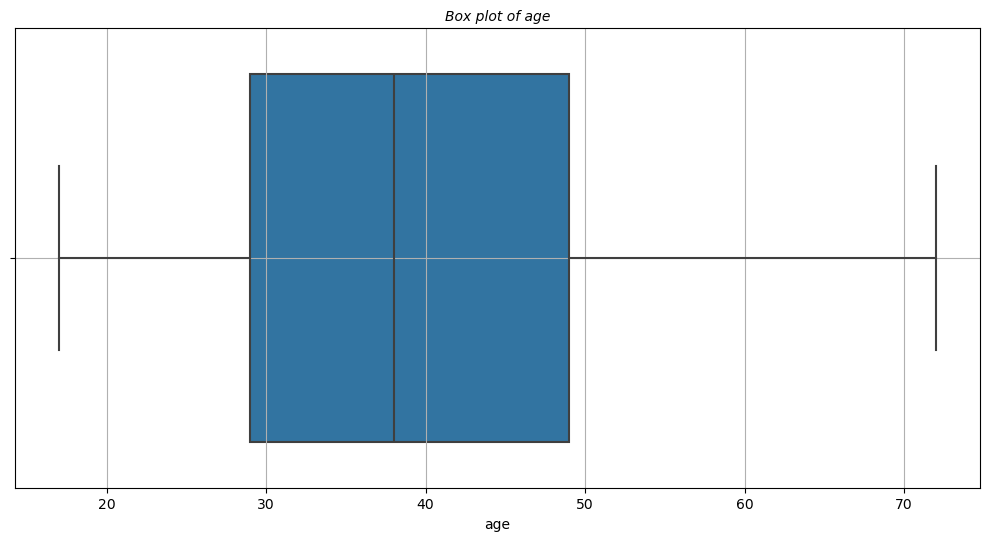

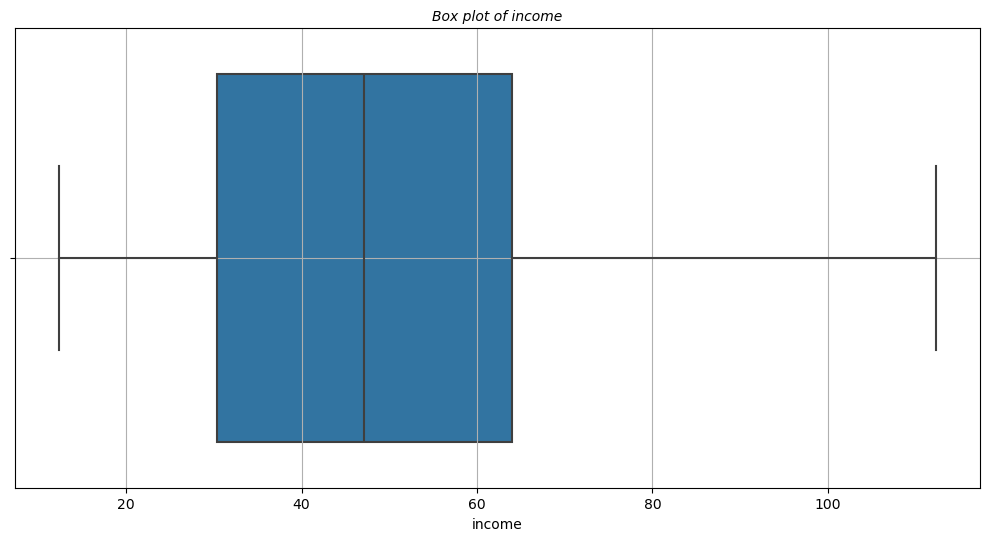

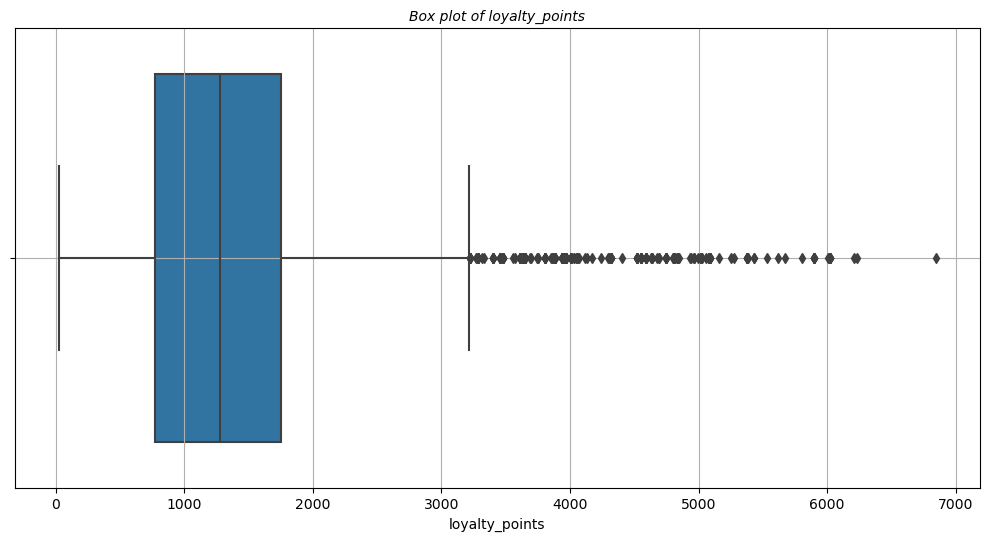

In [24]:
# Function to generate summary statistics
def generate_summary_statistics(df, file_name):
    logging.info(f'Summary statistics for {file_name}:')
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
    if numerical_cols:
        logging.info(f'\nNumerical summary statistics for {file_name}:\n{df[numerical_cols].describe()}\n')
    if categorical_cols:
        logging.info(f'\nCategorical summary statistics for {file_name}:\n{df[categorical_cols].describe(include=["object", "category"])}\n')

# Function to plot boxplots
def plot_boxplots(df, columns):
    for column in columns:
        try:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=df[column])

            # Main title
            plt.title(f'Box plot of {column}', fontsize=10, style='italic')

            # Customizing x-axis label
            plt.xlabel(f'{column}')

            # Adding grid for better readability
            plt.grid(True)

            plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make sure everything fits without overlap
            plt.show()

        except Exception as e:
            logging.error(f"Error while plotting box plot for {column}: {str(e)}")

# Main workflow for EDA
def main():
    try:
        # Load cleaned data
        reviews = pd.read_csv('turtle_reviews_cleaned.csv')

        # Generate summary statistics
        generate_summary_statistics(reviews, 'turtle_reviews')

        # Plot boxplots
        columns_to_plot = ['age', 'income', 'loyalty_points']
        plot_boxplots(reviews, columns_to_plot)

    except Exception as e:
        logging.exception("An error occurred during EDA")

if __name__ == "__main__":
    main()

There are no outlier values detected in age and income. There are some outliers in the loyalty points. These will be removed to improve the predictive models. As spending score was an assigned value between 1-100, outlier values are not applicable and products are assigned product codes, therefore it would not be applicable to do outlier analysis. 

In [26]:
# Function to detect and remove outliers from a specific column
def detect_and_remove_outlier_values(df, column, file_name):
    """
    Detects and removes outliers in a specified numerical column of a DataFrame using the IQR method.
    
    Parameters:
    - df: DataFrame to analyze.
    - column: Column name to detect outliers.
    - file_name: Name of the file or dataset for logging purposes.

    Returns:
    - Cleaned DataFrame with outliers removed.
    - Dictionary with IQRLower, IQRUpper, and the number of outliers removed.
    """
    logging.info(f'\nOutlier detection and removal for {file_name} - {column}:')
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for detecting outliers
    IQRLower = Q1 - 1.5 * IQR
    IQRUpper = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[column] < IQRLower) | (df[column] > IQRUpper)]
    
    # Log the details
    logging.info(f'Column: {column}')
    logging.info(f'Q1: {Q1}, Q3: {Q3}, IQR: {IQR}')
    logging.info(f'IQRLower: {IQRLower}, IQRUpper: {IQRUpper}')
    logging.info(f'Number of outliers: {outliers.shape[0]}')
    
    # Remove outliers from the DataFrame
    df_cleaned = df[~((df[column] < IQRLower) | (df[column] > IQRUpper))]

    return df_cleaned, {
        'IQRLower': IQRLower,
        'IQRUpper': IQRUpper,
        'num_outliers_removed': outliers.shape[0]
    }

# Main workflow to remove outliers from 'loyalty_points' and save to a new file
def main():
    try:
        # Load the cleaned data
        reviews = pd.read_csv('turtle_reviews_cleaned.csv')
        
        # Detect and remove outliers from the 'loyalty_points' column
        cleaned_reviews, outlier_info = detect_and_remove_outlier_values(reviews, 'loyalty_points', 'cleaned_reviews.csv')
        
        # Save the cleaned DataFrame to a new CSV file
        cleaned_reviews.to_csv('turtle_reviews_no_outliers.csv', index=False)
        
        # Log the outcome
        logging.info(f"Outliers removed: {outlier_info['num_outliers_removed']}")
        logging.info("Cleaned data saved to 'turtle_reviews_no_outliers.csv'")
    
    except Exception as e:
        logging.exception("An error occurred during outlier detection and removal")

if __name__ == "__main__":
    main()


2024-08-22 10:31:13,615 - INFO - 
Outlier detection and removal for cleaned_reviews.csv - loyalty_points:
2024-08-22 10:31:13,620 - INFO - Column: loyalty_points
2024-08-22 10:31:13,621 - INFO - Q1: 772.0, Q3: 1751.25, IQR: 979.25
2024-08-22 10:31:13,622 - INFO - IQRLower: -696.875, IQRUpper: 3220.125
2024-08-22 10:31:13,622 - INFO - Number of outliers: 266
2024-08-22 10:31:13,635 - INFO - Outliers removed: 266
2024-08-22 10:31:13,635 - INFO - Cleaned data saved to 'turtle_reviews_no_outliers.csv'


In [27]:
# continue with the no outlier files
reviews = pd.read_csv('turtle_reviews_no_outliers.csv')
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          1734 non-null   object 
 1   age             1734 non-null   int64  
 2   income          1734 non-null   float64
 3   spending_score  1734 non-null   int64  
 4   loyalty_points  1734 non-null   int64  
 5   education       1734 non-null   object 
 6   product         1734 non-null   int64  
 7   review          1734 non-null   object 
 8   summary         1734 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 122.1+ KB


### 5a) spending vs loyalty

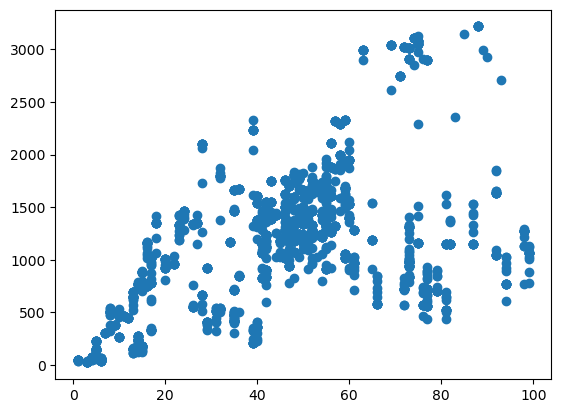

In [29]:
# Define independent variable. reshape values to fit model
x = reviews['spending_score'].values.reshape(-1, 1) 

# Define dependent variable.
y = reviews['loyalty_points'].values.reshape(-1, 1) 

# Check for linearity with Matplotlib.
plt.scatter(x, y)

In [30]:
# Create model and print summary of metrics.
lr = LinearRegression()

# Fit the model.
lr.fit(x, y) 

LinearRegression()

In [31]:
# Control the shuffling/avoid variation in values between variables.
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.7,
                                                    random_state=42)

In [32]:
# Fit the model once again with the train data
lr.fit(x_train, y_train)

LinearRegression()

In [33]:
# Predict the training set values.
y_pred = lr.predict(x_train) 

# View the output.
y_pred

array([[1612.55398918],
       [ 493.40026624],
       [1223.28312903],
       ...,
       [1061.0869373 ],
       [ 704.25531549],
       [1109.74579482]])

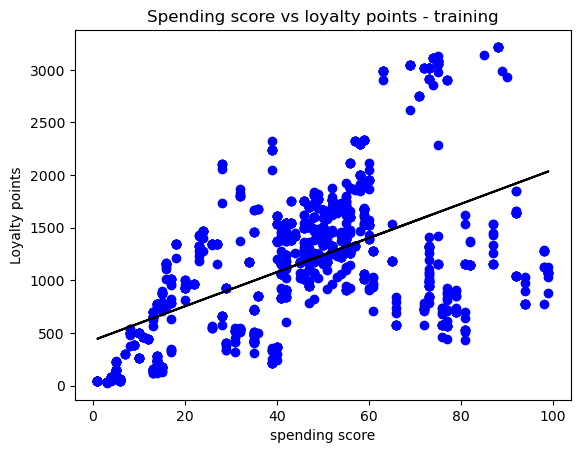

In [34]:
# Create a scatterplot with a regression line.
plt.scatter(x_train, y_train, color = 'blue')  
plt.plot(x_train, y_pred, color = 'black')

# Set the title and legends for the graph.  
plt.title("Spending score vs loyalty points - training")
plt.xlabel("spending score")
plt.ylabel("Loyalty points") 

# Print the graph. 
plt.show() 

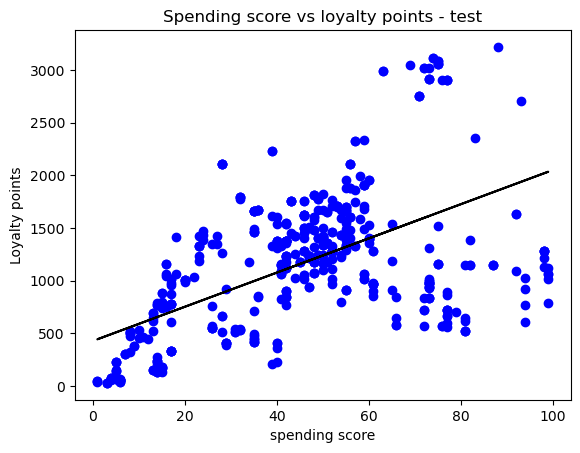

In [35]:
# Visualise the test set.
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_train, lr.predict(x_train), color = 'black')
# Set the title and legends for the graph.  
plt.title("Spending score vs loyalty points - test")
plt.xlabel("spending score")
plt.ylabel("Loyalty points")

plt.show()

In [36]:
# Print the R-squared, intercept and coefficient value.
print("R-squared value: ", lr.score(x_test, y_test))

print("Intercept value: ", lr.intercept_)
print("Coefficient value: ", lr.coef_)

R-squared value:  0.26824027371138437
Intercept value:  [428.52178955]
Coefficient value:  [[16.21961917]]


The R-squared tells us that the model is explaining 45.95% of the data.
The coefficient value of 32.09 tells us that as the spending score variable increases by 1, the predicted value of loyalty points increases by 32.09.

In [38]:
# predicted loyalty points for each sending_score
predictedloyalty = lr.predict([[5], [10], [15], [20], [25], [30], [35], [40], [45], [50], [60], [70], [80]])  

# Print the results.
print(f"Predicted Loyalty points:\n{predictedloyalty}")  

Predicted Loyalty points:
[[ 509.61988541]
 [ 590.71798128]
 [ 671.81607714]
 [ 752.91417301]
 [ 834.01226887]
 [ 915.11036474]
 [ 996.2084606 ]
 [1077.30655647]
 [1158.40465234]
 [1239.5027482 ]
 [1401.69893993]
 [1563.89513166]
 [1726.09132339]]


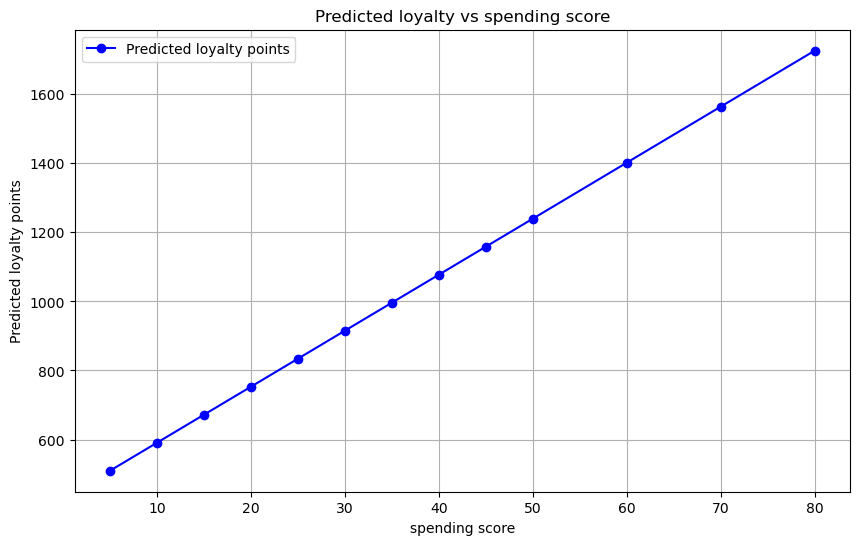

In [39]:
spending_score = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80]
# Plot the predicted loyalty points 
plt.figure(figsize=(10, 6))
plt.plot(spending_score, predictedloyalty, marker='o', color='b', label='Predicted loyalty points')

# Add labels and title
plt.xlabel('spending score')
plt.ylabel('Predicted loyalty points')
plt.title('Predicted loyalty vs spending score')

# Optionally add a grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

In [40]:
# Run the OLS test.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     741.8
Date:                Thu, 22 Aug 2024   Prob (F-statistic):          2.94e-136
Time:                        10:31:14   Log-Likelihood:                -13468.
No. Observations:                1734   AIC:                         2.694e+04
Df Residuals:                    1732   BIC:                         2.695e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    450.9021     29.307     15.385      0.000     393.421     508.384
x             15.7800      0.579     27.237      0.000      14.644      16.916
==============================================================================
Omnibus:                       51.429   Durbin-Watson:                   1.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.291
Skew:                           0.428   Prob(JB):                     9.86e-13
Kurtosis:                       3.180   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient for the independent variable x (33.0617) is highly significant (p-value < 0.001), indicating a strong relationship between x and the dependent variable. For each one-unit increase in x - spending point, the dependent variable (loyalty points) is expected to increase by about 33.06 units.

In [42]:
# Set the X coefficient and the constant to generate the regression table.
# Define the coefficient (slope) for the independent variable (X)
X_coefficient = 33.06  
constant = -75.05       

# Create a dictionary to represent the regression table
regression_table = -75.05 + 33.06 * x

# Convert the dictionary to a DataFrame to display it as a table
regression_df1 = pd.DataFrame(regression_table)

# Print the regression table
print(regression_df1)

            0
0     1214.29
1     2602.81
2      123.31
3     2470.57
4     1247.35
...       ...
1729   486.97
1730   685.33
1731   189.43
1732   453.91
1733   189.43

[1734 rows x 1 columns]


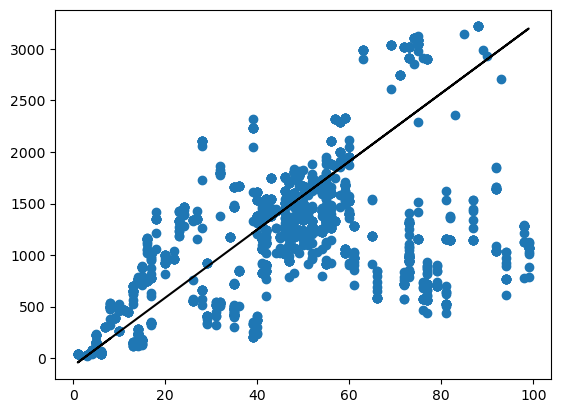

In [43]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(x, y)

# Plot the line.
plt.plot(x, regression_table, color='black')

### 5b) renumeration (income) vs loyalty

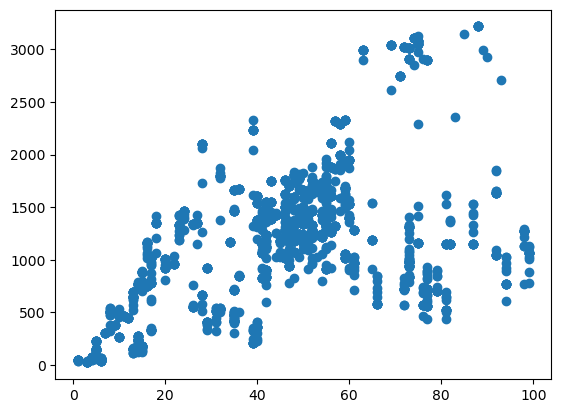

In [45]:
# Define independent variable. reshape values to fit model
x2 = reviews['income'].values.reshape(-1, 1) 

# Define dependent variable.
y = reviews['loyalty_points'].values.reshape(-1, 1) 

# Check for linearity with Matplotlib.
plt.scatter(x, y)

In [46]:
# Create model and print summary of metrics.
lr = LinearRegression()

# Fit the model.
lr.fit(x2, y) 

LinearRegression()

In [47]:
# Control the shuffling/avoid variation in values between variables.
x_train, x_test, y_train, y_test = train_test_split(x2, y,
                                                    train_size=0.7,
                                                    random_state=42)

In [48]:
# Fit the model once again with the train data
lr.fit(x_train, y_train)

LinearRegression()

In [49]:
# Predict the training set values.
y_pred = lm.predict(x_train) 

# View the output.
y_pred

NameError: name 'lm' is not defined

In [ ]:
# Create a scatterplot with a regression line.
plt.scatter(x_train, y_train, color = 'green')  
plt.plot(x_train, y_pred, color = 'black')

# Set the title and legends for the graph.  
plt.title("Income vs loyalty points - training")
plt.xlabel("Income")
plt.ylabel("Loyalty points") 

# Print the graph. 
plt.show()

In [ ]:
# Visualise the test set.
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_train, lr.predict(x_train), color = 'black')
# Set the title and legends for the graph.  
plt.title("Income vs loyalty points - test")
plt.xlabel("Income")
plt.ylabel("Loyalty points")

plt.show()

In [ ]:
# Print the R-squared, intercept and coefficient value.
print("R-squared value: ", lr.score(x_test, y_test))

print("Intercept value: ", lr.intercept_)
print("Coefficient value: ", lr.coef_)

The R-squared tells us that the model is explaining 32.89% of the data.
The coefficient value of 32.09 tells us that as the spending score variable increases by 1, the predicted value of loyalty points increases by 32.09.

### 5c) age vs loyalty

In [ ]:
# Define independent variable.


# Define dependent variable.


# Create model and print summary of metrics.


In [ ]:
# Extract the estimated parameters.


# Extract the standard errors.


# Extract the predicted values.


In [ ]:
# Set the X coefficient and the constant to generate the regression table.


# View the output.


In [ ]:
# Plot graph with regression line.


## 6. Observations and insights

***Your observations here...***






# Week 2 assignment: Exploring the structure using decision trees.

The team wants you to use decision trees to attempt to better understand the structure found in the data. You need to grow and prune a decision tree regressor and then visualise and interpret the output.
Make sure to comment on the potential usefulness in decision-making processes and your observations regarding the model.

## Instructions
1. Prepare the data for creating your decision tree. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame with the appropriate columns.
        1. Specify that loyalty points is the target variable (Y) and should be excluded from your input data.
        2. Specify X for the independent variables and y as the dependent variable. Therefore, df\[cols\] will be the independent variables and the column containing loyalty points the dependent variable.
        3. Explore the new DataFrame. 
2. Split the data set into a train and test sets for both X and y at a 70:30 ratio. As previously, random_state=42.
3. Create a decision tree regressor to explore the impact of other features on the loyalty points.
    1. Import the DecisionTreeRegressor class from the sklearn.tree library. 
    2. Create a variable (e.g. regressor) to store the DecisionTreeRegressor() class. (As previously, random_state=42.).
    3. Fit the regressor object to the data set with the fit() function.
    4. Remember to prune your tree using basic pruning strategies and compare the performance before and after applying the pruning strategy.
    5. Plot the final decision tree.
4. Fit a final model and interpret the output.
    1. Justify your selection of pruning strategy implemented and interpret the output.
    2. Evaluate the usefulness of the obtained result and interpret the tree and how it could be used to inform business decisions in the organisation.
5. Summarise (150–200 words) the most important business insights, anything you would like to explore further, and suggested future actions.
 
Back up your work to a safe location. This will allow you to revert to a previous state in the case of making a mistake in the code or deleting a section by mistake. (A simple way of doing this is to save or email a compressed version to yourself at frequent intervals.)


## 1. Load and prepare the data

In [ ]:
# Import all the necessary packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt

# Settings for the notebook.
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]

In [ ]:
# Create your new DataFrame.



In [ ]:
# Specify Y.

# Specify X.


In [ ]:
# Review X and Y.


## 2. Create train and test data sets.

In [ ]:
# Split the data into test and train data.


## 3. Create Decision tree regressor

In [ ]:
# Create your decision tree regressor.


In [ ]:
# Evaluate the model.


In [ ]:
# Prune the model.


## 4. Fit and plot final model.

In [ ]:
# Fit and plot final model.


## 5. Discuss: Insights and observations

***Your observations here...***

In [ ]:
# Interpret model and note observations.


# 

# Week 3 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df3`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [ ]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the CSV file(s) as df2.


# View DataFrame.


In [ ]:
# Drop unnecessary columns.


# View DataFrame.


In [ ]:
# Explore the data.


In [ ]:
# Descriptive statistics.


## 2. Plot

In [ ]:
# Create a scatterplot with Seaborn.


In [ ]:
# Create a pairplot with Seaborn.


## 3. Elbow and silhoutte methods

In [ ]:
# Determine the number of clusters: Elbow method.


In [ ]:
# Determine the number of clusters: Silhouette method.


## 4. Evaluate k-means model at different values of *k*

## 5. Fit final model and justify your choice

In [ ]:
# Apply the final model.


In [ ]:
# Check the number of observations per predicted class.


## 6. Plot and interpret the clusters

In [ ]:
# Visualising the clusters.


# View the DataFrame.


In [ ]:
# Visualising the clusters.



## 7. Discuss: Insights and observations

***Your observations here...***

# 

# Week 4 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [ ]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the data set as df3.


# View DataFrame.


In [ ]:
# Explore data set.


In [ ]:
# Keep necessary columns. Drop unnecessary columns.


# View DataFrame.


In [ ]:
# Determine if there are any missing values.


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [ ]:
# Review: Change all to lower case and join with a space.


In [ ]:
# Summary: Change all to lower case and join with a space.


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [ ]:
# Replace all the punctuations in review column.


# View output.


In [ ]:
# Replace all the puncuations in summary column.


# View output.


### 2c) Drop duplicates in both columns

In [ ]:
# Drop duplicates in both columns.


# View DataFrame.


## 3. Tokenise and create wordclouds

In [ ]:
# Create new DataFrame (copy DataFrame).


# View DataFrame.


In [ ]:
# Apply tokenisation to both columns.


# View DataFrame.


In [ ]:
# Review: Create a word cloud.


In [ ]:
# Review: Plot the WordCloud image.


In [ ]:
# Summary: Create a word cloud.


In [ ]:
# Summary: Plot the WordCloud image.


## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [ ]:
# Determine the frequency distribution.


### 4b) Remove alphanumeric characters and stopwords

In [ ]:
# Delete all the alpanum.


In [ ]:
# Remove all the stopwords


### 4c) Create wordcloud without stopwords

In [ ]:
# Create a wordcloud without stop words.


In [ ]:
# Plot the wordcloud image.


### 4d) Identify 15 most common words and polarity

In [ ]:
# Determine the 15 most common words.


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [ ]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [ ]:
# Determine polarity of both columns. 


# View output.


In [ ]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


In [ ]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [ ]:
# Top 20 negative reviews.


# View output.


In [ ]:
# Top 20 negative summaries.


# View output.


In [ ]:
# Top 20 positive reviews.


# View output.


In [ ]:
# Top 20 positive summaries.


# View output.


## 7. Discuss: Insights and observations

***Your observations here...***

# 